# Avacado Average price prediction

### Problem Statement:

#### Avocado is a fruit consumed by people heavily in the United States. In this dataset we have 18249 rows and 14 columns including both dependent and indpendent variables. The goal is to predict the average price which is continuous in nature of the different type of avocado and using the region that in which region they are lying. Since the target variable is is continuous in nature will use Regresson models to predict the price of the fruit* 

#### The following are the relevant columns in the dataset

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

#### Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

# Importing necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/roni96007/ProjectsDatatrained/main/Evalaution%20Projects/Project%202-Avacado%20Project/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Loading the avacado file and reading it in a dataframe.
* The dataframe has 14 columns which contains boths features and target variable.
* In task 1, Average Price is the target variable which contains continuous data, so it is a regression type problem.
* In task 2, we will take "Region" as the target column which has classes, so it is a classification problem. 
* The dataset contains both numeric as well as categorical data.
* As seen in the dataset the column unnamed is there only for index purpose,so we can drop this column.

In [5]:
# Dropping the unnamed column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Showing first five rows of the dataset.

# Exploratory Data Analysis (EDA)

In [7]:
#checking the dimension of the dataset
df.shape

(18249, 13)

There are 18249 rows and 13 columns in the dataset.

In [8]:
# checking the types of the dataset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The columns in this dataset contains three different types of data - float, integer and object datatype.
There are 3 columns having object datatype that are categorical in nature which needs to be encoded.
The Date column is showing object datatype. So splitting the Date into Month and Day. Since year column is already present, no need to separate it.

In [9]:
# Changing date column from object type to Date type
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# Checking the dtypes again
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

We can see that the date column has datetime datatype. Now splitting the data into months and day

In [11]:
df['Month'] = df['Date'].dt.month

In [12]:
df['Day'] = df['Date'].dt.day

Now we have separated Month and Day from Date column and now the column Date is no use,so dropping it.

In [13]:
df.drop("Date",axis=1,inplace=True)

In [14]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [15]:
# checking the dimensions of dataset again
df.shape

(18249, 14)

Now the dataset has 18249 rows and 14 columns as we added 2 more columns from date.

In [16]:
# Overviewing the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


This gives the brief information about the dataset which includes indexing type, column type, no-null values and memory usage.

In [17]:
# checking the number of unique values in each column
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

These are the unique values present in the dataset.

In [18]:
# Checking for null values
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

As we can see there are no null values present in the dataset.

#### Visualizing Missing Values using heatmap

<AxesSubplot:>

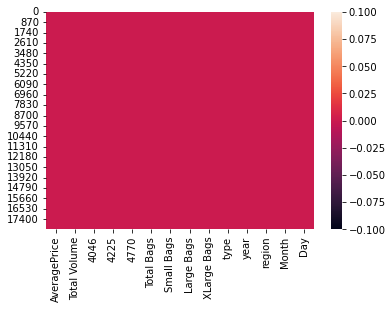

In [19]:
# Visualizing null values using heatmap
sns.heatmap(df.isnull())

By visualizing also we can also say there are no missing values and the data is clean.

In [20]:
# checking the number of columns in the datast
df.columns.tolist()

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region',
 'Month',
 'Day']

These are the columns present in the dataset.

In [21]:
# Checking the uniqueness of the target variable
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

These are the unique values present in the target column.

In [22]:
# List of values in the target column
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

This gives the list of values in the target variable which has int64 datatype

In [23]:
# Checking whether the dataset contains any space
df.loc[df['AveragePrice']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day


As we can see, there are no spaces present in the dataset.

# Description of Dataset

In [24]:
# Statistical summary of the dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000



This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things.

* The counts of all the columns are same which means there are no null values present in the daaset.
* The label Average Price has mean which is bit greater than median, means it is skewed to right. The minimum price of the single fruit avocado is 0.44 dollars(say), max is 3.25 and mean is 1.04.
* The mean and the median(50%) are very close to each other in most of the columns like 4225(Total number of avocados with PLU 4225), year, Month, Day which means the data is symmetrical (normal) in these columns.
* The mean is greater than the median in most of the columns which means they are skewed to right.
* In some of the columns median is greater than the mean, hence they are skewed to left.
* Most of the columns have nearly zero statistics also the mean and the standard deviation are very close to each other.
* By looking at the difference between max and 75% (3rd quantile), we can infer there are outliers present in most of the column. We will remove this outliers in further steps.
* Before visualizing the data let's separate the categorical and numerical columns.

In [25]:
# Checking for Categorical columns
Categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        Categorical_col.append(i)
print(Categorical_col)

['type', 'region']


These are the categorical columns which nedds to be encoded.

In [26]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


These are the numerical columns present in the dataset.

# Visualization of Dataset

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


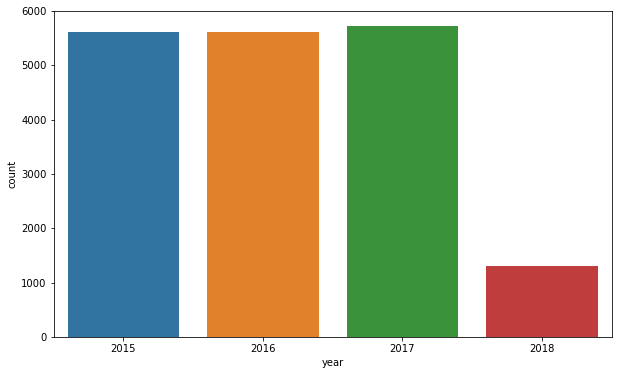

In [27]:
# Visualize the count of the year
print(df['year'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(df['year'])
plt.show()

The count of 2017 is bit higher than2016 and 2015, 2018 has very less count, which means the price and the sales of avacado is less in this year.

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

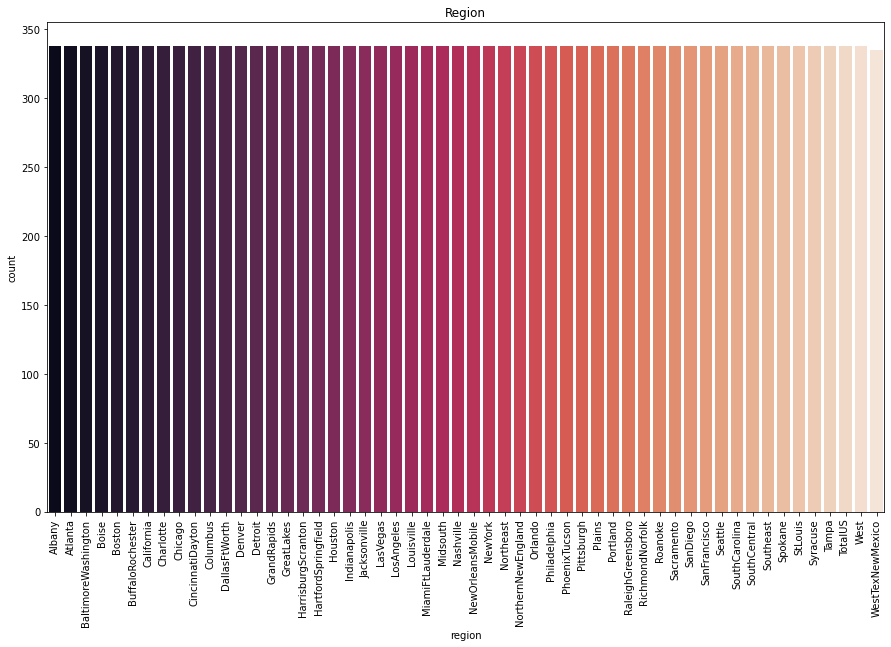

In [28]:
# Visualize the count of the region
print(df['region'].value_counts())
plt.figure(figsize=(15,9))
sns.countplot(df['region'],palette="rocket")
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

We can observe the count of avacado is almost same in all the regions, all of them have the count338 but WestTestNewMexico has count 335 which is a bit less than other regions.
Lets plot the distribution plot to know how the data has been distributed in all the columns.

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


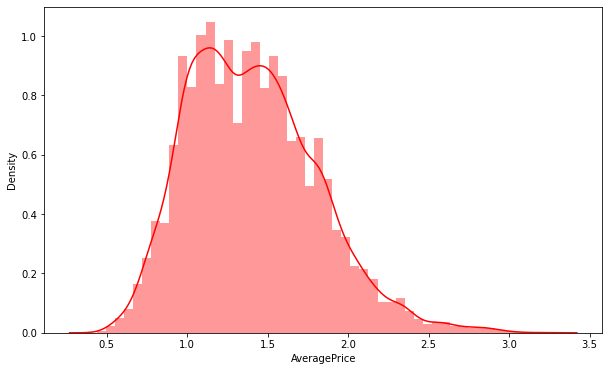

In [29]:
# Distribution plot fro the target variable "AveragePrice"
print(df['AveragePrice'].value_counts())
plt.figure(figsize=(10,6))
sns.distplot(df['AveragePrice'], color='r')
plt.show()

We can visualize that the data is normally distributed in the label. Also the prioce of the avacado is more between 1.0 - 1.5.

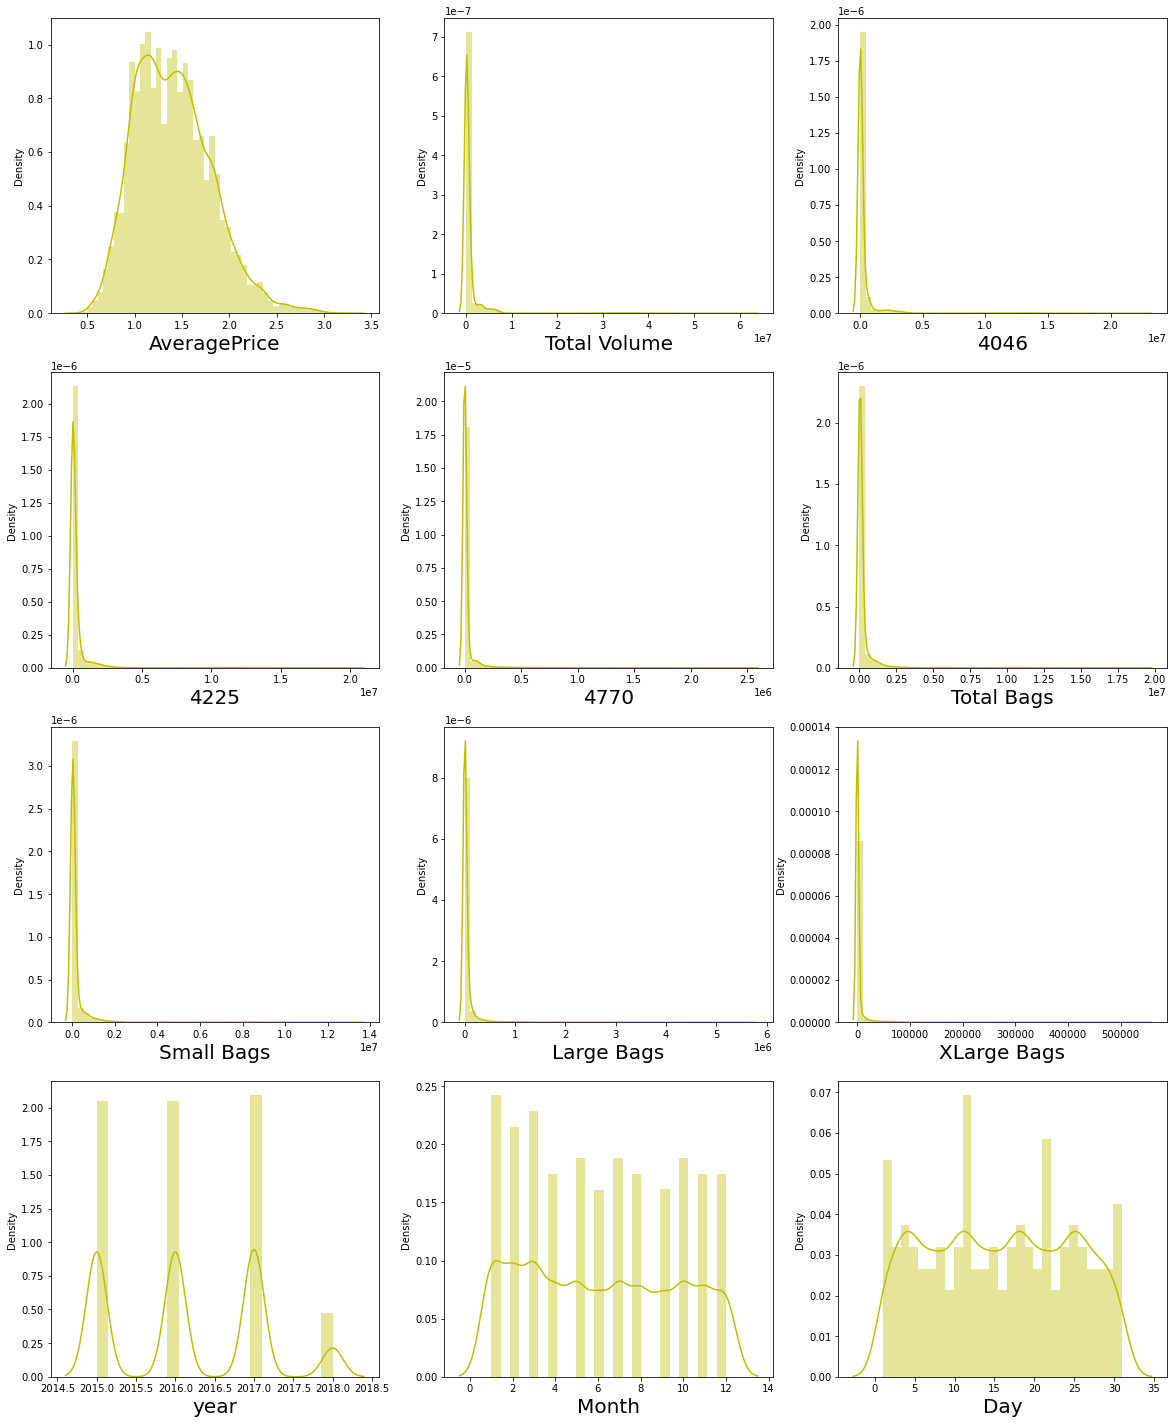

In [30]:
# Checking how the data is distributed in each column.
plt.figure(figsize=(20,25))
plotnumber = 1

for col in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[col],color='y')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

From the graphs we can observe that none of the columns are normally distributed except thetarget column.
Also there is a huge skewness in almost of the features, most of them are skewed to the left which means median is more than the mean.
This skewness needs to be removed later.

# Bivariate Analysis:

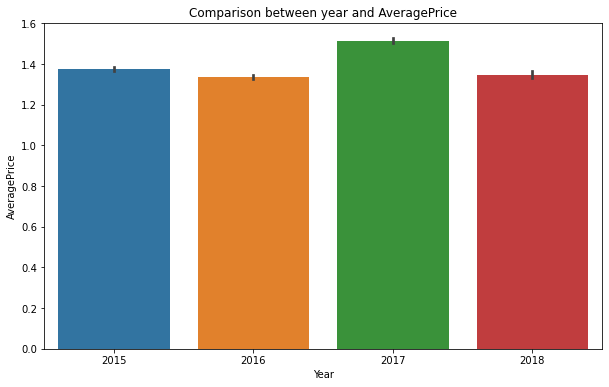

In [31]:
# Checking which year haqs maximum AveragePrice
plt.figure(figsize=(10,6))
plt.title("Comparison between year and AveragePrice")
sns.barplot(df['year'],df['AveragePrice'],data = df)
plt.xlabel("Year")
plt.ylabel("AveragePrice")
plt.show()

The barplot shows that the AveragePrice is maximum in the year 2017 followed by2 2015.

In [32]:
!?sns.catplot

'?sns.catplot' is not recognized as an internal or external command,
operable program or batch file.


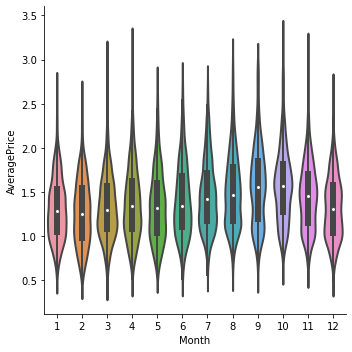

In [33]:
sns.catplot(x = "Month", y = "AveragePrice", kind ='violin', data=df, linewidth=2)

From the plot we can say that the AveragePrice remians high during 8th(August month), 9th(September) and 10th(October) month and starts to fall from November onwards
Also the price of avocado is less in the months may to july and again there is an increment of price of avocado in the month April and March.

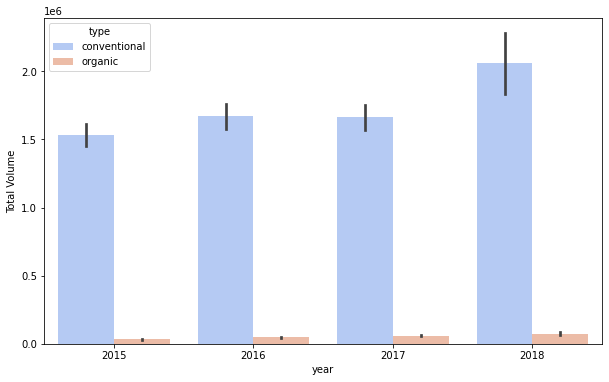

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='coolwarm',ci=68)
plt.show()

Conventional types were sold higher every year with low price than organic types which means the dem,and for conventional is also high.
Also the total sales volume is spotted int he year 2018 and then declined in 2015. The total sales are same in the year 2016 ands 2017.

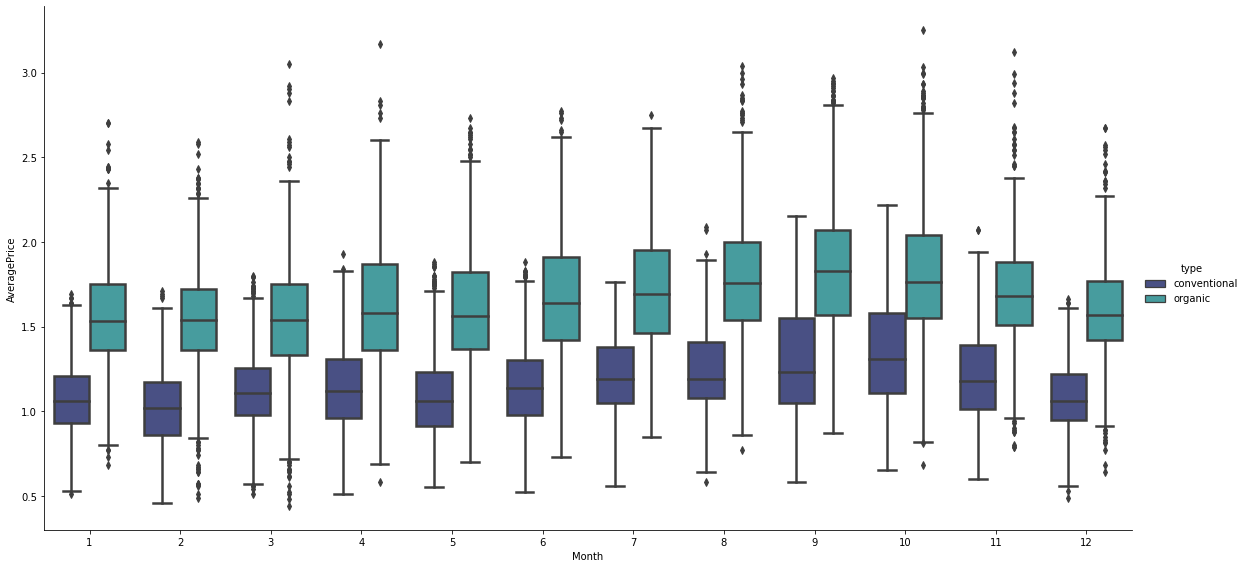

In [35]:
sns.catplot(x='Month', y='AveragePrice', hue='type', kind = 'box', data=df, height=8, linewidth=2.5, aspect=2, palette='mako')

Here we can notice that the AveragePrice of organic avocado fruit is more than the conventional type. As we can observe the AveragePrice of both type of avocados is high in the months August, September and October and it pulled down in November. Also the price is high in April and March.

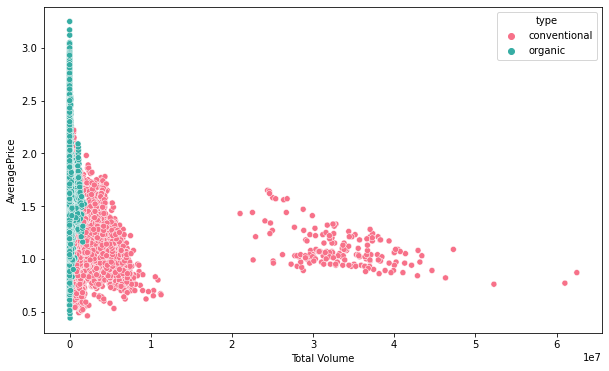

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Total Volume",y='AveragePrice',hue='type',data=df,palette='husl')
plt.show()

The scatterplot givces the relationship between the total volume and average price with respect to type.
All organic type of avacado lies in the zero volume and the average price is high for organic.
The conventional type avacado has total volume 0-4 with the average price upto 2.3. So the Average Price of the organic type with zero volume is more than the conventional type.

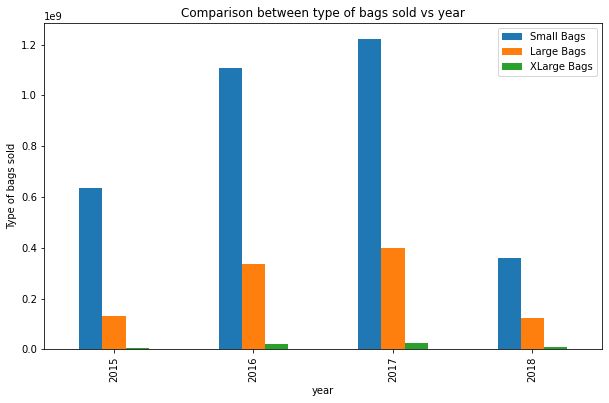

In [37]:
feature = df[['Small Bags','Large Bags','XLarge Bags']].groupby(df.year).sum()
feature.plot(kind='bar', fontsize=10,figsize=(10,6))
plt.title("Comparison between type of bags sold vs year")
plt.xlabel('year')
plt.ylabel("Type of bags sold")
plt.show()

Small bag size was sold all time highest where Xlarge Bag size was least sold.

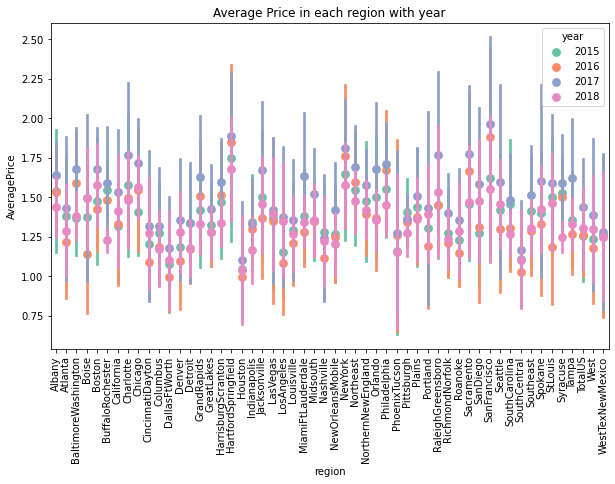

In [38]:
plt.figure(figsize=(10,6))
plt.title("Average Price in each region with year")
sns.pointplot(x='region',y='AveragePrice',data=df,hue='year',join=False,palette='Set2',ci='sd')
plt.xticks(rotation=90)
plt.show()

The average price of the avacado is high in the region San Francisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high in the year 2017
and less in the year 2018.

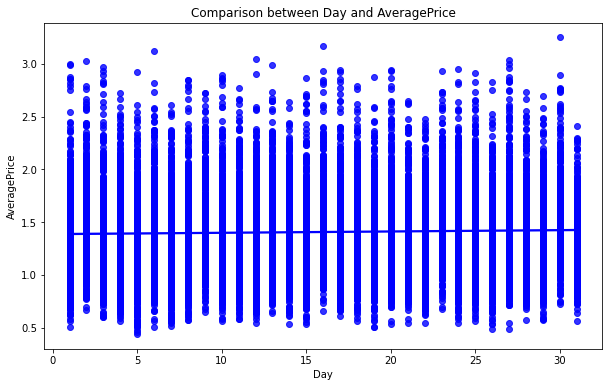

In [39]:
plt.figure(figsize=(10,6))
plt.title("Comparison between Day and AveragePrice")
sns.regplot(df['Day'],df['AveragePrice'],color='b')
plt.show()

The average price of avacado id high in almost all the days and less in 7th,14th and 22nd day of the month.

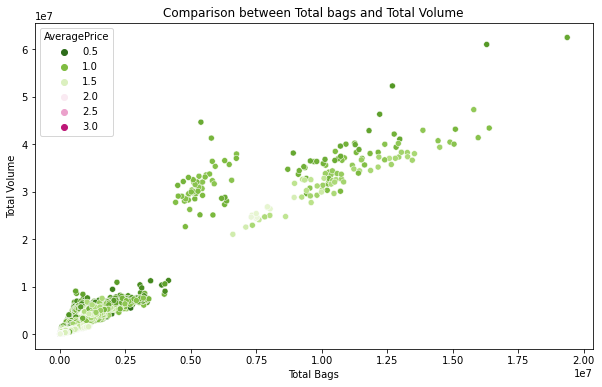

In [40]:
plt.figure(figsize=(10,6))
plt.title("Comparison between Total bags and Total Volume")
sns.scatterplot(data=df,x='Total Bags', y ='Total Volume',hue='AveragePrice',palette='PiYG_r')
plt.show()

We can see a linear relation between the Total bags with Total Volume. As the total bags sales increases with total volume,the price of the avacado also increases.

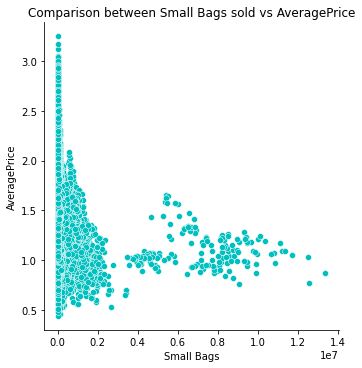

In [41]:
sns.relplot(df['Small Bags'],df['AveragePrice'],color='c')
plt.title("Comparison between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

The small Bag size has high average price at first and also from the range 0-0.6,the price of small bag size is almost 1.6.

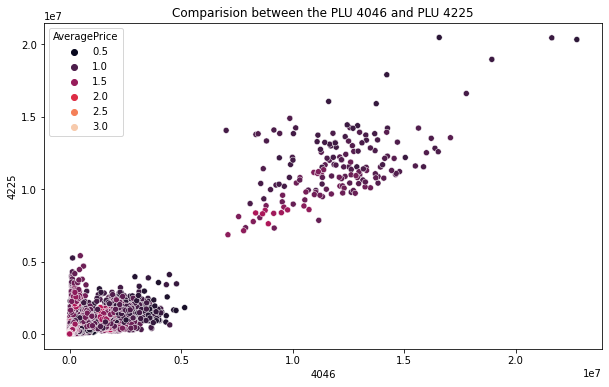

In [42]:
plt.figure(figsize=(10,6))
plt.title("Comparision between the PLU 4046 and PLU 4225")
sns.scatterplot(df["4046"],df["4225"],hue=df["AveragePrice"],palette="rocket")
plt.show()

There is a linear relationship between the total number of avacados with PLU 4046 and PLU 4225 sold. The number opf avacados with PLU 4046 and PLU 4225 sold increases, the average price also increases as shown in the graph.These scatter plots can also be observed in the pairplot.

# Outliers

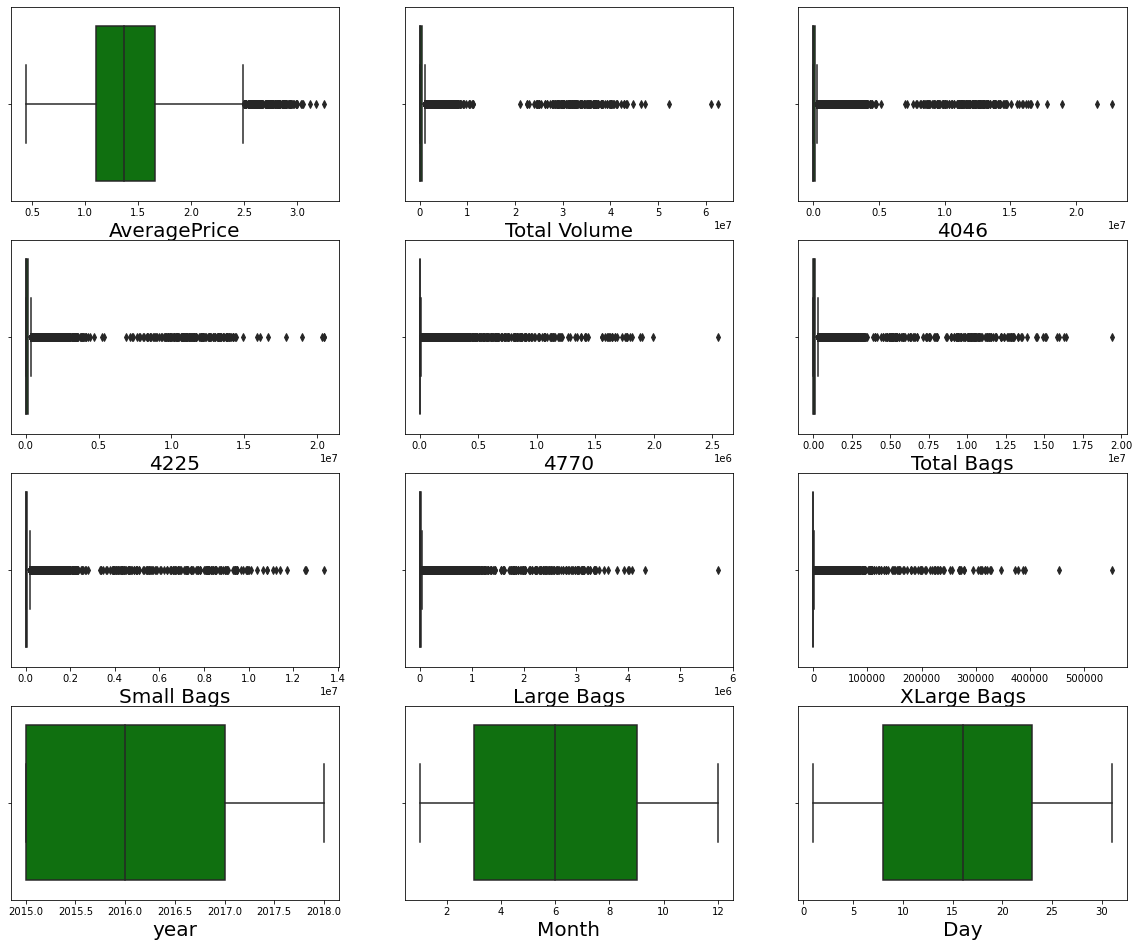

In [45]:
numerical_col = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year','Month','Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for col in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[col],color='g')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

As we can see heavy outliers are present in almost all the columns except year,Month and Day which needs to be removed for futher data processing.Even the label has outliers present but as it is target variable, no need to remove outlier from it.

# Removing Outliers:

In [46]:
from scipy.stats import zscore
features = df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
z = np.abs(zscore(features))
z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


Now the outliers have been removed.

In [47]:
new_df = df[(z<3).all(axis=1)]
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [48]:
print(df.shape)
print(new_df.shape)

(18249, 14)
(17782, 14)


###### Data loss percent

In [49]:
(18249-17782)/18429*100

2.5340495957458353

Using zscore, we are losing only 2.5% of data. Now trying with IQR

## IQR method

In [50]:
# 1st quantile
Q1 = features.quantile(0.25)

# 3rd Quantile
Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1
df1 = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [51]:
print(df.shape)
print(df1.shape)

(18249, 14)
(11747, 14)


In [52]:
# Checking data loss
(18249-11747)/18249*100

35.62934955340019

Using IQR the data loss is quiet high. So we would consider Zscore

# Checking for Skewness

In [53]:
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

All the columns have skewness except year, Month and Day.

# Removing Skewness using yeo-johnson

In [54]:
# Removing skewness using yeo johnson to get better predictions
features = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [55]:
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [56]:
# Checking the skewness after applying yeo-johnson method
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

We can see that after applying yeo-johnson method,there is still skewness present in XLarge Bags.So, removing it using log trnsformation

In [57]:
# Removing skewness using log transformation
new_df['XLarge Bags']=np.log1p(new_df['XLarge Bags'])

The skewness has been removed.Lets check it.

In [58]:
# Checking the skewness again
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

So the complete skewness has been removed using log transformation and yeo-johnson method.

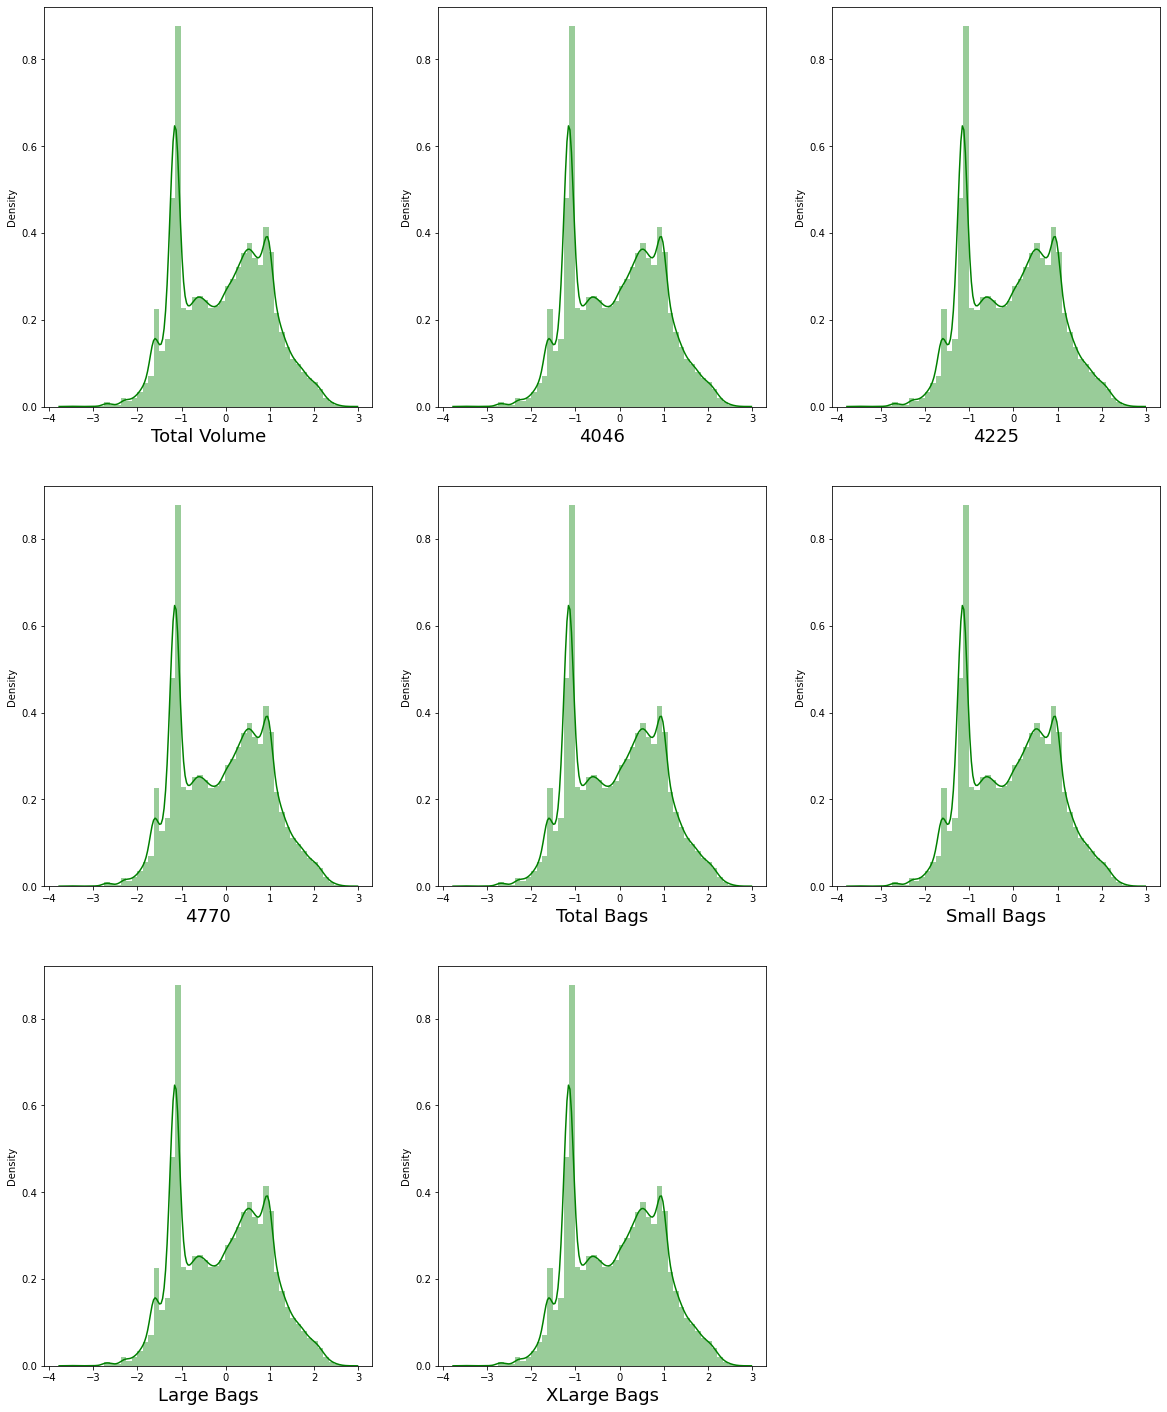

In [59]:
# Checking the data distribution in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for col in new_df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[features],color='g')
        plt.xlabel(col,fontsize=18)
    plotnumber+=1
plt.show()

Now the data looks normal comparatively to previous one and the skewness has been removed.

# Encoding the Categorical data using LabelEncoder

In [60]:
from sklearn.preprocessing import LabelEncoder
categorical_col = ['type','region']
lbl = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(lbl.fit_transform)

In [61]:
new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


So we have encoded the categorical data.

# Correlation

In [62]:
new_df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,-0.017598,0.020885,0.010991
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,0.021970,-0.005044,-0.002469


This gives the correlation between dependent and independent variables.

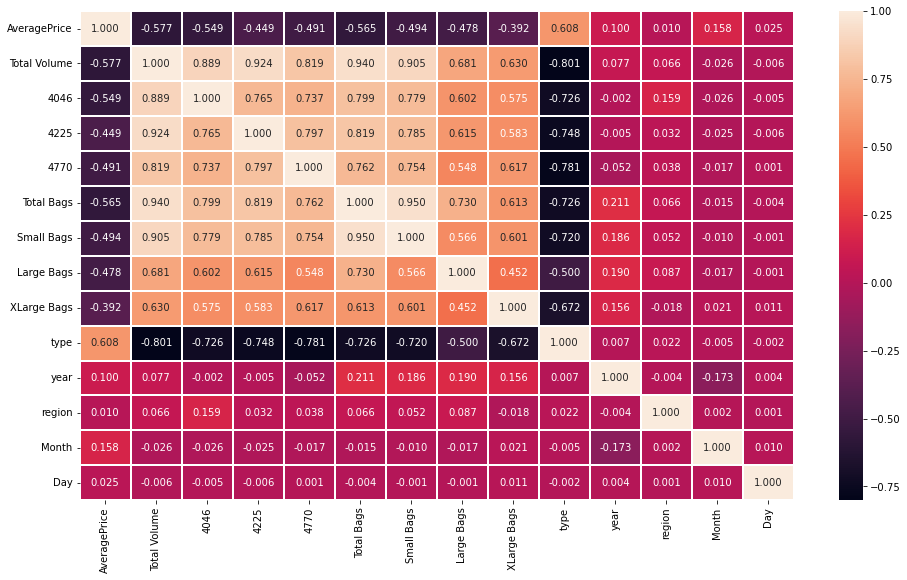

In [63]:
#Lets visualize the coorelation using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt="0.3f",annot=True)
plt.show()

The heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature with another.
This heatmap contains both positive and negative correlation. 
* Almost all features are highly negatively correlated with the target variable and few columns year, month andtype have positive coorelation with the target.
* The features Day and the region has no relation with the target,so we can drop these columns.
* Almost all the features are correlated with each other which lead to multicolinearity problem which can be resolved using VIF.
* Also most of the columns have no correlation with each other and have zero correlation


# Visualizing the correaltion between label and features using bar plot

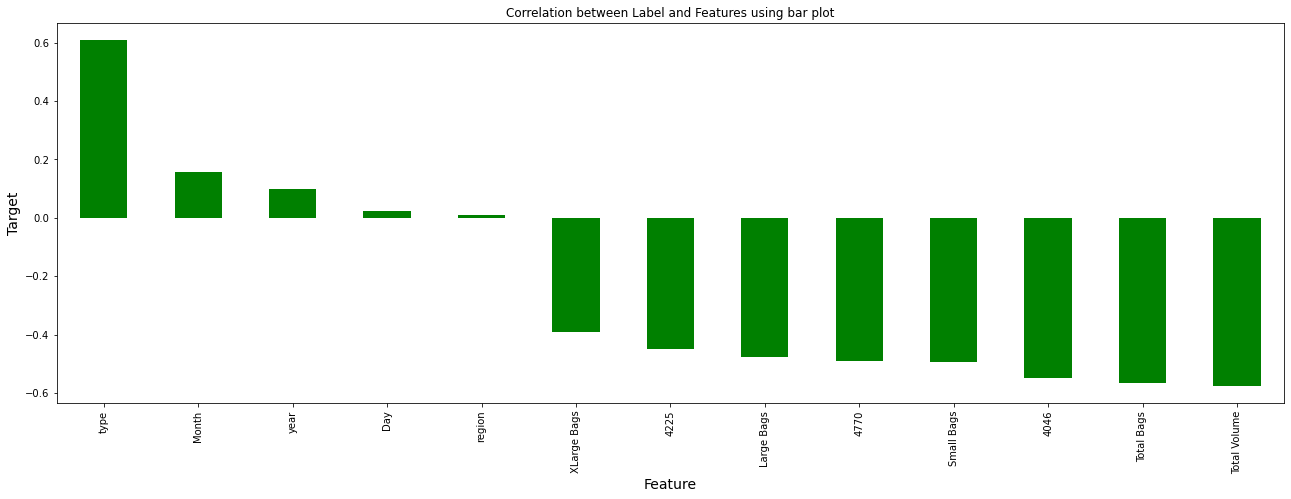

In [64]:
plt.figure(figsize=(22,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title("Correlation between Label and Features using bar plot")
plt.show()

The features Day and region has very less correlation with the target so we can drop these colums.

In [65]:
# Dropping irrelavent columns
new_df.drop('region',axis=1,inplace=True)
new_df.drop('Day',axis=1,inplace=True)

In [66]:
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,12
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,12
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,12
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,12
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,11


# Separating out features and labels

In [67]:
x = new_df.drop('AveragePrice',axis=1)
y = new_df['AveragePrice']

In [68]:
x.shape

(17782, 11)

In [69]:
y.shape

(17782,)

In [70]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,12
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,12
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,12
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,12
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,11


This is the dataframe having only features

# Standard Scalarization

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,1.358706
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.685946,0.974238,1.979143,-1.185845
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.685946,0.974238,1.979143,-1.468572
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.685946,0.974238,1.979143,-1.468572
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.685946,0.974238,1.979143,-1.468572


This is the scaled data. As there is multicolinearity problem, we need to use VIF

# Multicolinearity

In [72]:
# Finding variance inflation factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,51.806476,Total Volume
1,6.808776,4046
2,11.158951,4225
3,3.951861,4770
4,34.441003,Total Bags
5,16.630696,Small Bags
6,3.462408,Large Bags
7,2.065369,XLarge Bags
8,3.720176,type
9,1.386160,year


The vif value is more than 10 in ther features Total Volume,4225,Total Bags','Small Bags' and 'Large Bags'.Removing the vif having highest vif value

In [73]:
# Dropping the feature Total Bags
df.drop('Total Volume',axis=1,inplace=True)

In [74]:
# Again checking the vif after removing one column
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,51.806476,Total Volume
1,6.808776,4046
2,11.158951,4225
3,3.951861,4770
4,34.441003,Total Bags
5,16.630696,Small Bags
6,3.462408,Large Bags
7,2.065369,XLarge Bags
8,3.720176,type
9,1.386160,year


The multocollinearity problem still exists so let's drop the feature Total Bags which has high VIF value.

In [75]:
# Droping the column total Bags
df.drop('Total Bags',axis=1,inplace=True)

In [76]:
# checking VIF again
vif = pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,51.806476,Total Volume
1,6.808776,4046
2,11.158951,4225
3,3.951861,4770
4,34.441003,Total Bags
5,16.630696,Small Bags
6,3.462408,Large Bags
7,2.065369,XLarge Bags
8,3.720176,type
9,1.386160,year


Now the value is less than 10 in all the features that means multicolinearity problem has solved.

In [77]:
# DataFrame after preprocessing and data cleaning.
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,1.358706


# Modeling

In [78]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [79]:
from sklearn.neighbors import KNeighborsRegressor as KNN

maxAcc = 0
maxRS = 0
for i in range(0,100):
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=.30,random_state=i)
    knn=KNN()
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2_score is ",maxAcc,"at random_state",i)

Maximum r2_score is  0.8722597064485668 at random_state 99


# Creating new train test split

In [80]:
x_train,x_test,y_train,y_test = TTS(x,y,test_size=.30,random_state=maxRS)

# Regression Algorithms

In [81]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# RandomForestRegressor

In [82]:
# checking r2_score for RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
print("R2_score :",r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_RFR))

# Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,pred_RFR))

# Root Mean Squared error(RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_RFR)))

R2_score : 0.870110866789763
MAE: 0.10175090909090907
MSE: 0.021423181512652295
RMSE: 0.14636659971678065


The r2_score using RandomForestRegressor is 86%.

# Linear Regression

In [83]:
# Checking r2_score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
print("R2_score:",r2_score(y_test,pred_LR))
print("MAE:",metrics.mean_absolute_error(y_test,pred_LR))
print("MSE:",metrics.mean_squared_error(y_test,pred_LR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_LR)))

R2_score: 0.5609708060626831
MAE: 0.20820421362985356
MSE: 0.07241100066353587
RMSE: 0.2690929219870635


The r2_score using Linear Regression is 56%.

# Support Vector Machine Regressor

In [85]:
# checking r2_score for SVR
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print("r2_score:",r2_score(y_test,pred_svr))
print("MAE:",metrics.mean_absolute_error(y_test,pred_svr))
print("MSE:",metrics.mean_squared_error(y_test,pred_svr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_svr)))

r2_score: 0.7775935149055376
MAE: 0.13994550363046002
MSE: 0.0366824720591341
RMSE: 0.1915266875898346


The r2_score using Support Vector Regressor is 77%

# Stochastic Gradient Descent Regressor

In [86]:
# Checking r2_score for SGD
SGD = SGDRegressor()
SGD.fit(x_train,y_train)
pred_SGD = SGD.predict(x_test)
print("R2_score:",r2_score(y_test,pred_SGD))
print("MAE:",metrics.mean_absolute_error(y_test,pred_SGD))
print("MSE:",metrics.mean_squared_error(y_test,pred_SGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_SGD)))

R2_score: 0.5574100564501112
MAE: 0.20881764842573508
MSE: 0.07299829063449721
RMSE: 0.2701819583808238


The r2_score using Stochastic Gradient Descent Regressor is 55%

# KNN Regressor

In [87]:
# Checking r2_score for KNN
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print("R2_score:",r2_score(y_test,pred_knn))
print("MAE:",metrics.mean_absolute_error(y_test,pred_knn))
print("MSE:",metrics.mean_squared_error(y_test,pred_knn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_knn)))

R2_score: 0.8722597064485668
MAE: 0.10231452671040299
MSE: 0.021068764011246487
RMSE: 0.1451508319343933


The r2_score using KNNRegressor is 87%

# Gradient Boosting Regressor

In [88]:
# Checking r2_score for KNN
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred_GB = GB.predict(x_test)
print("R2_score:",r2_score(y_test,pred_GB))
print("MAE:",metrics.mean_absolute_error(y_test,pred_GB))
print("MSE:",metrics.mean_squared_error(y_test,pred_GB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_GB)))

R2_score: 0.7223771770071541
MAE: 0.16172558176495552
MSE: 0.045789543605653474
RMSE: 0.21398491443476447


The R2 score using GradientBoosting Regressor regressor is 72%

# Hyperparameter Tuning

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
# KNeighbor Regressor
parameters = {'n_neighbors':[2,3,4,5,6],
             'algorithm':['auto','ball_tree','kd_tree','brute'],
             'leaf_size':[10,20,30,40,50],
             'weights':['uniform','distance']}

In [92]:
GCV = GridSearchCV(KNN(),parameters,cv=5)

In [93]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [94]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}

In [95]:
avacado = KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
avacado.fit(x_train,y_train)
pred = avacado.predict(x_test)
print("RMSE value :",np.sqrt(metrics.mean_squared_error(y_test,pred_RFR)))
print('R2_score :',r2_score(y_test,pred)*100)

RMSE value : 0.14636659971678065
R2_score : 88.9932165604187


After tuning the r2_score of the model is increased and it is 88%.

# Saving the model

In [128]:
# saving the model using pkl
import pickle
filename1='Avacado.pkl'
pickle.dump(avacado, open(filename1,'wb'))

#### Saved the model in Avacado.pkl file

# Task 2

#### We need to find the region of Avacado observation. There are 53 different regions in the dataset.So, it its a type of multi-classification problem.

In [100]:
df_region =pd.read_csv('avocado.csv')
df_region

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [101]:
# List of values in the target column
df_region['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [102]:
# Checking the uniqueness of the target variable
df_region['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [103]:
#Label encoding the target column
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df_region['region'] = lbl.fit_transform(df_region['region'])

In [104]:
df_region['region']

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

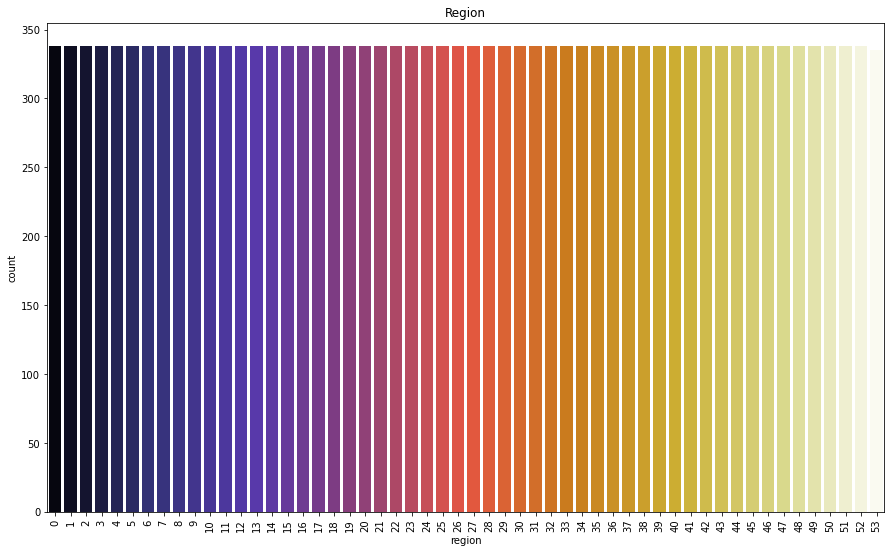

In [105]:
# Visualizing the region
plt.figure(figsize=(15,9))
sns.countplot(df_region['region'],palette="CMRmap")
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

Here we can see the total number of regions are 53 and each of them having almost the same number os avacado count.

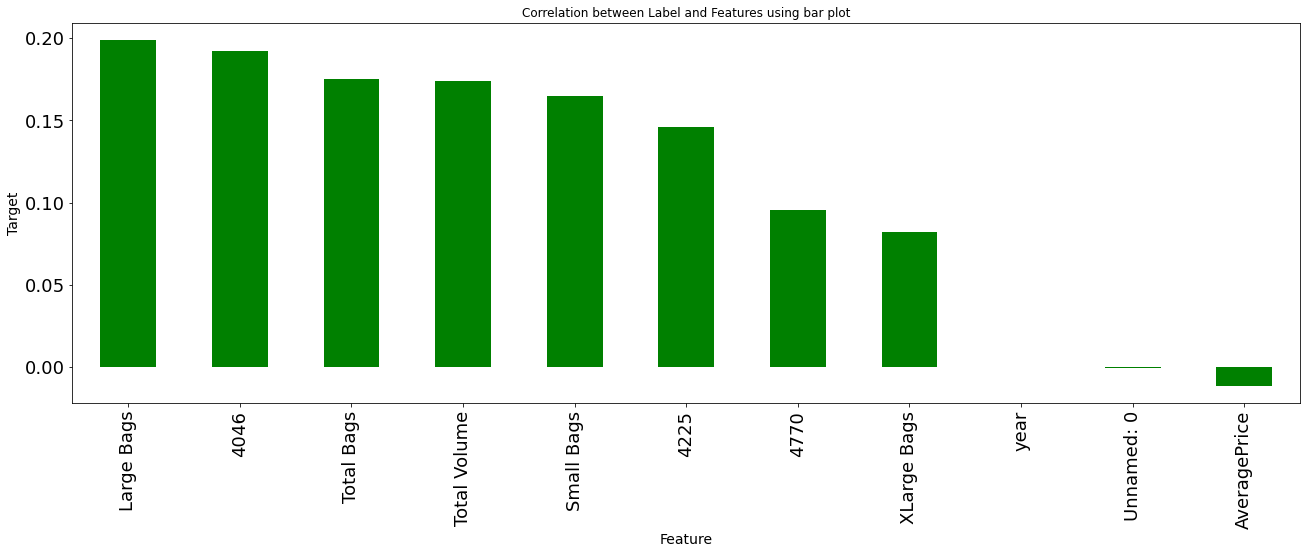

In [106]:
plt.figure(figsize=(22,7))
df_region.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='g',fontsize=18)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title("Correlation between Label and Features using bar plot")
plt.show()

We can drop the columns Unnamed and year sa they are irreleavnt.

In [107]:
# Dropping the unnamed column
df_region.drop("Unnamed: 0",axis=1,inplace=True)

In [108]:
# Dropping the year column
df_region.drop("year",axis=1,inplace=True)

As we have already visualized the dataset and have seen the description and correlation of region with all other variables, we can proceed further.

In [109]:
# Changing date column from object type to Date type
df_region['Date'] = pd.to_datetime(df_region['Date'])

In [110]:
df_region['Month'] = df_region['Date'].dt.month

In [111]:
df_region['Day'] = df_region['Date'].dt.day

Now we have separated Month and Day from Date column and now the column Date is no use,so dropping it.

In [112]:
# Dropping the Date column
df_region.drop("Date",axis=1,inplace=True)

In [113]:
df_region.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,0,11,29


In [114]:
# LabelEncoding the type column
df_region['type']= lbl.fit_transform(df_region['type'])

In [115]:
# Splitting the independent and dependent columns

x = df_region.drop(['region'], axis =1)
y = df_region['region']

In [116]:
x.shape

(18249, 12)

In [117]:
y.shape

(18249,)

## Separating dependent and independent variables

# Standard Scalarization

In [118]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.18868864, -0.22771641, -0.23081597, ..., -0.99983562,
         1.64763162,  1.29185687],
       [-0.13901962, -0.23042664, -0.23110251, ..., -0.99983562,
         1.64763162,  0.49423066],
       [-1.18206895, -0.21208462, -0.23100731, ..., -0.99983562,
         1.64763162, -0.30339555],
       ...,
       [ 1.15237477, -0.24233073, -0.2306933 , ...,  1.00016441,
        -1.46495942,  0.60817726],
       [ 1.30138182, -0.24162464, -0.2304279 , ...,  1.00016441,
        -1.46495942, -0.18944895],
       [ 0.53151208, -0.24125273, -0.22934712, ...,  1.00016441,
        -1.46495942, -0.98707516]])

# Finding best random state:

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.3304109589041096  on Random_State  199


We found that the best random_state value is 199. We'll create train_test split at random state = 199

## Creating train_test Split:

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=199)

# LogisticRegression:

In [121]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.3304109589041096
[[ 30   0   0 ...   0   0   0]
 [  5  26   0 ...   0   0   0]
 [  0   0  42 ...   0   0   0]
 ...
 [  0   0   0 ... 100   7   0]
 [  0   0   0 ...   1  61   0]
 [  1   1   0 ...   0   0  21]]
              precision    recall  f1-score   support

           0       0.18      0.32      0.23        95
           1       0.51      0.27      0.36        95
           2       0.62      0.43      0.51        97
           3       0.07      0.34      0.11        94
           4       0.44      0.23      0.30       101
           5       0.31      0.23      0.27        96
           6       0.73      0.58      0.64       102
           7       0.16      0.32      0.21        94
           8       0.46      0.46      0.46       113
           9       0.27      0.51      0.35        92
          10       0.16      0.18      0.17        99
          11       0.20      0.55      0.29        96
          12       0.51      0.36      0.42       109
          13       0.74      0.2

From LogisticRegression we're getting 33% accuracy score.

## RandomForestClassifier:

In [122]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.8942465753424658
[[ 83   0   0 ...   0   0   0]
 [  0  86   0 ...   0   0   0]
 [  0   0  95 ...   0   0   0]
 ...
 [  0   0   0 ... 108   0   0]
 [  0   0   0 ...   1 104   0]
 [  0   1   0 ...   0   0  83]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87        95
           1       0.83      0.91      0.86        95
           2       0.93      0.98      0.95        97
           3       0.88      0.84      0.86        94
           4       0.90      0.91      0.91       101
           5       0.90      0.80      0.85        96
           6       0.98      0.98      0.98       102
           7       0.95      0.93      0.94        94
           8       0.96      0.96      0.96       113
           9       0.88      0.88      0.88        92
          10       0.84      0.90      0.87        99
          11       0.96      0.94      0.95        96
          12       0.99      0.89      0.94       109
          13       0.83      0.8

From RandomForestClassifier we're getting 89% accuracy score.

## DecisionTreeClassifier:

In [123]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.7647488584474886
[[ 72   0   0 ...   0   0   0]
 [  0  67   0 ...   0   0   0]
 [  0   0  84 ...   0   0   1]
 ...
 [  0   0   0 ... 108   0   0]
 [  0   0   0 ...   1  99   0]
 [  0   2   1 ...   0   0  63]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        95
           1       0.66      0.71      0.68        95
           2       0.88      0.87      0.87        97
           3       0.67      0.80      0.73        94
           4       0.76      0.80      0.78       101
           5       0.78      0.69      0.73        96
           6       0.94      0.95      0.95       102
           7       0.83      0.77      0.80        94
           8       0.91      0.92      0.92       113
           9       0.73      0.68      0.71        92
          10       0.64      0.62      0.63        99
          11       0.81      0.76      0.78        96
          12       0.84      0.79      0.82       109
          13       0.72      0.6

From DecisionTreeClassifier, we're getting 76% accuracy score.

# SVC:

In [124]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print(accuracy_score(y_test, predsv))
print(confusion_matrix(y_test, predsv))
print(classification_report(y_test, predsv))

0.228675799086758
[[ 4  0  1 ...  0  0  0]
 [ 6 16  2 ...  0  0  5]
 [ 3  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 94  1  0]
 [ 0  0  0 ...  1 53  0]
 [ 3  7  2 ...  0  0 24]]
              precision    recall  f1-score   support

           0       0.02      0.04      0.03        95
           1       0.31      0.17      0.22        95
           2       0.25      0.42      0.32        97
           3       0.00      0.00      0.00        94
           4       0.35      0.13      0.19       101
           5       0.07      0.25      0.11        96
           6       0.92      0.47      0.62       102
           7       0.07      0.02      0.03        94
           8       0.96      0.47      0.63       113
           9       0.47      0.18      0.27        92
          10       0.05      0.07      0.06        99
          11       0.15      0.65      0.25        96
          12       0.80      0.33      0.47       109
          13       0.81      0.23      0.36       107
          14   

From SVC we're getting 22% accuracy score.

# Hyper parameter tuning:

In [126]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters={"n_estimators":[10,100,500],'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

In [ ]:
y_pred = clf.predict(x_test)
print("accuracy_score :",accuracy_score(y_test, y_pred))
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))

#### After hyper parameter tuning we got 99% accuracy score.

# Saving the final model:

In [134]:
import pickle

In [135]:
# saving the model using pkl
import pickle
filename2='Avacado_Train.pkl'
pickle.dump(avacado,open(filename2,'wb'))